In [111]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import csv
import math

In [71]:
#derived constants from expirementation
tpm = 1649 #ticks per meter

#assumed measurement std deviation
s = 0.05

In [78]:
#system simulation parameters
#samples per second
sps = 100 #100hz motor encoder polling speed
#robot moving speed
vel = 0.5 #m/s
#travel distance to simulate
tot_dist = 5 #meters

#robot info
b = 0.3 #robot wheelbase

num_samples = tot_dist/vel*sps
print("Total samples: ", num_samples)

Total samples:  1000.0


In [37]:
L_ticks = np.linspace(0,int(tot_dist*tpm),int(num_samples))
R_ticks = L_ticks
#print(L_ticks)
#plt.plot(L_ticks)
#plt.show()

In [80]:
#function returns dist based on # of ticks
def dist_from_ticks(ticks):
    dist = ticks * (1/tpm)
    return(dist)

In [114]:
def scos(x): return sp.N(sp.cos(math.radians(x)))
def ssin(x): return sp.N(sp.sin(math.radians(x)))

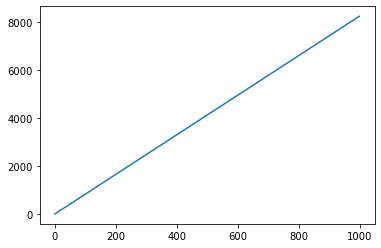

In [41]:
#plot L_ticks
plt.plot(L_ticks)
plt.show()

In [73]:
#add noise to L_ticks
noise = np.random.normal(0,s,L_ticks.shape)
#print(L_ticks.shape)
#print(noise.shape)
L_ticks_noise = L_ticks + noise

#add noise to R_ticks
noise = np.random.normal(0,s,R_ticks.shape)
R_ticks_noise = R_ticks + noise

In [121]:
#assume phi_k = 45 deg for now
phi_k = 45
for x in np.arange(num_samples):
    #calcualate the distance travelled by each wheel at each polling interval
    delta_Dk_l = dist_from_ticks(L_ticks_noise[int(x)])
    delta_Dk_r = dist_from_ticks(R_ticks_noise[int(x)])

    #calculte mid axis point distance
    delta_Dk = (delta_Dk_r + delta_Dk_l)/2 #eq 19
    #calcualte incremental orientation change
    delta_Phik = (delta_Dk_r - delta_Dk_l)/b #eq 20
    
    #short forms
    p = delta_Phik
    p2 = delta_Phik/2
    d2 = delta_Dk/(2*b)
    pk = 45

    #A and B control marices
    Ak =    [[1,0],
            [0,1]]
    Bk =    [[0.5 * scos(pk + p2) + d2 * ssin(pk + p2), 0.5 * scos(pk + p2) - d2 * ssin(pk + p2)],
            [0.5 * ssin(pk + p2) - d2 * scos(pk + p2), 0.5 * ssin(pk + p2) + d2 * scos(pk + p2)]]